# Iris Data Classification with Logistic Regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

sns.set_style('darkgrid')
sns.set_palette("mako")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


## Import and Explore the Data

In [2]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv", usecols= [1,2,3,4,5])
print(f"N_Samples: {df.size}")
df.head(5)

N_Samples: 750


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop_duplicates()
print(f"N_Samples: {df.size}")

N_Samples: 735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [5]:
df.groupby("Species").describe()

SepalLengthCm                                               \
                        count      mean       std  min  25%  50%  75%  max   
Species                                                                      
Iris-setosa              48.0  5.010417  0.359219  4.3  4.8  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936000  0.516171  4.9  5.6  5.9  6.3  7.0   
Iris-virginica           49.0  6.604082  0.632113  4.9  6.3  6.5  6.9  7.9   

                SepalWidthCm            ... PetalLengthCm      PetalWidthCm  \
                       count      mean  ...           75%  max        count   
Species                                 ...                                   
Iris-setosa             48.0  3.431250  ...           1.6  1.9         48.0   
Iris-versicolor         50.0  2.770000  ...           4.6  5.1         50.0   
Iris-virginica          49.0  2.979592  ...           5.9  6.9         49.0   

                                                              
                     mean       std  min  25%  50%  75%  max  
Species                                                       
Iris-setosa      0.250000  0.105185  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326000  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.028571  0.276887  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

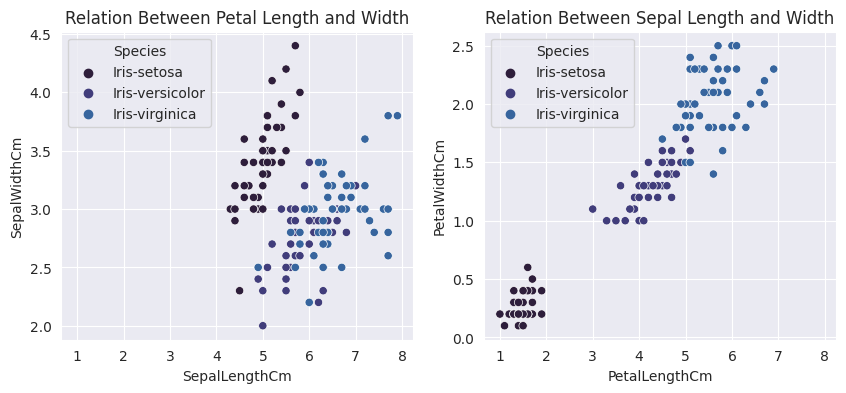

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex= True)
fig.set_size_inches(10, 4)

sns.scatterplot(data= df, x= "SepalLengthCm", y= "SepalWidthCm", hue= "Species", ax= ax1)
ax1.set_title("Relation Between Petal Length and Width")

sns.scatterplot(data= df, x= "PetalLengthCm", y= "PetalWidthCm", hue= "Species", ax= ax2)
ax2.set_title("Relation Between Sepal Length and Width")

plt.show()

Text(0.5, 1.0, 'Number of Samples per Category')

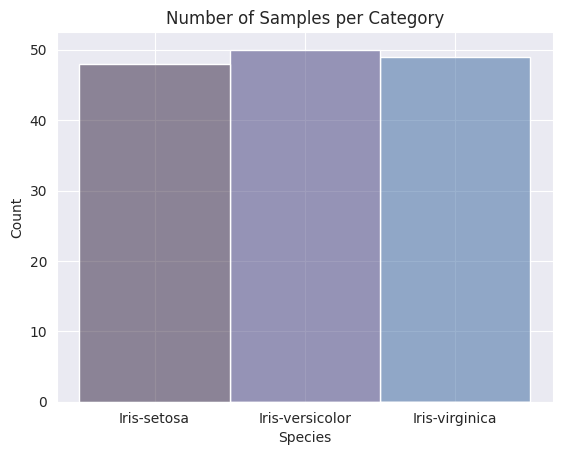

In [7]:
sns.histplot(data= df, x= "Species", hue= "Species", legend= False)
plt.title("Number of Samples per Category")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


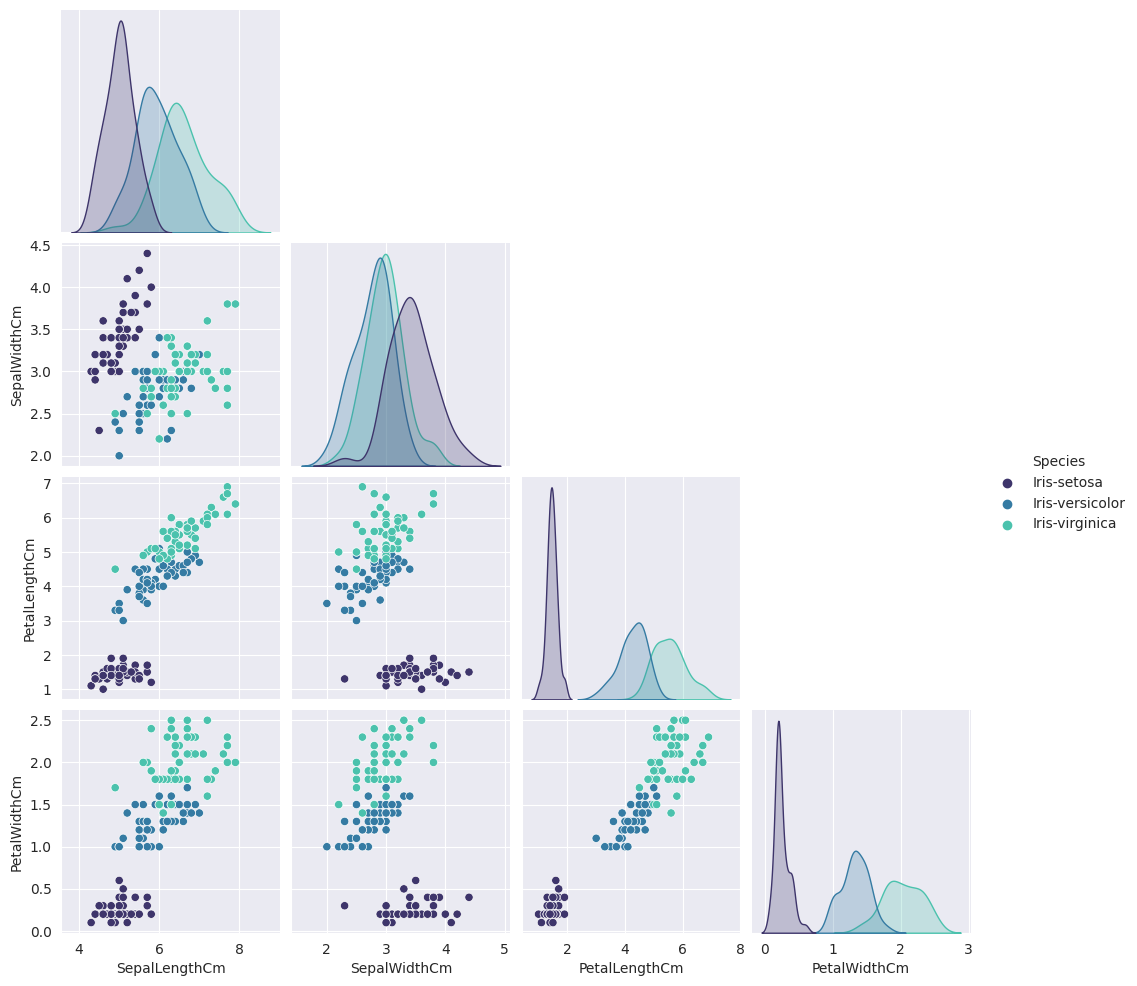

In [8]:
sns.pairplot(df, hue= "Species", palette= "mako", corner= True)
plt.show()

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

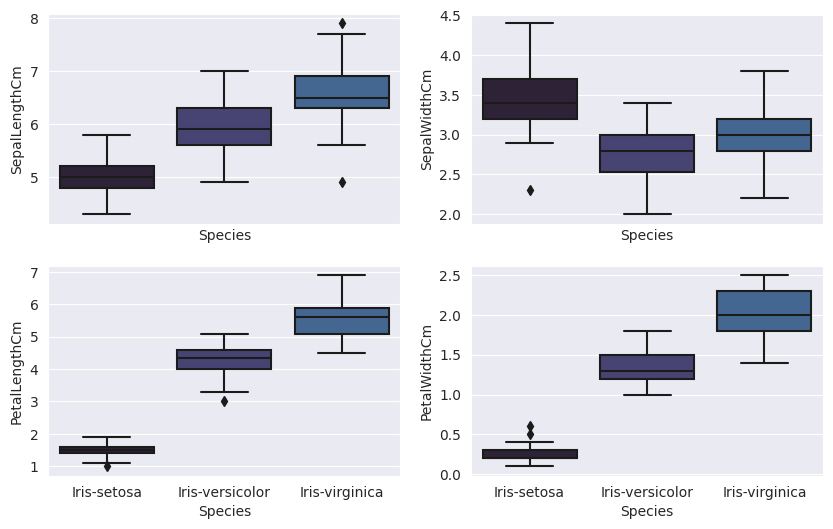

In [9]:
fig, axs = plt.subplots(2,2, sharex= True)
fig.set_size_inches(10, 6)

sns.boxplot(data= df, x= "Species", y= "SepalLengthCm", ax= axs[0,0])
sns.boxplot(data= df, x= "Species", y= "SepalWidthCm", ax= axs[0,1])
sns.boxplot(data= df, x= "Species", y= "PetalLengthCm", ax= axs[1,0])
sns.boxplot(data= df, x= "Species", y= "PetalWidthCm", ax= axs[1,1])

### Data Engineering

In [10]:
df["PetalArea"] = df.PetalLengthCm * df.PetalWidthCm
df["SepalArea"] = df.SepalLengthCm * df.SepalWidthCm

df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalArea,SepalArea
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28,18.00


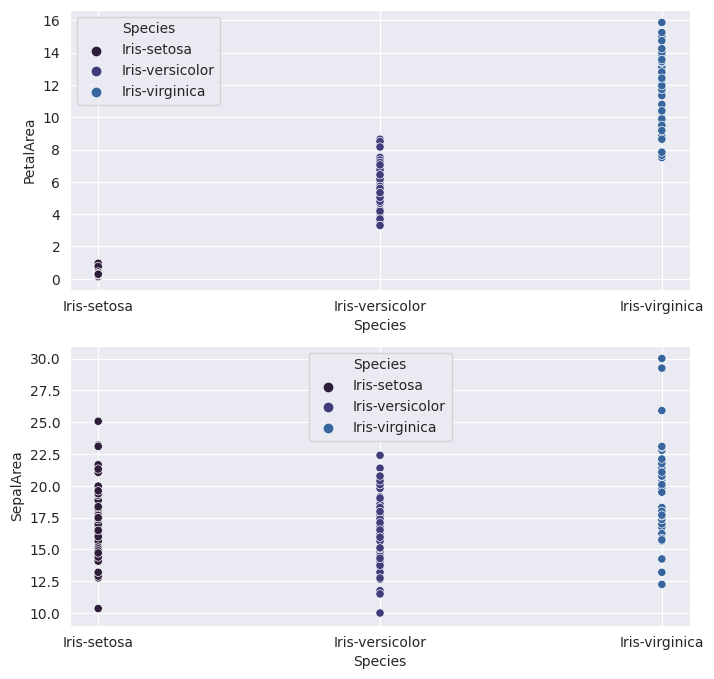

In [11]:
# Petal and Sepal Area Variables
fig, axes = plt.subplots(nrows= 2,ncols= 1, figsize= (8,8))

sns.scatterplot(data= df, x= "Species", y= "PetalArea", 
            hue= "Species", ax= axes[0]) 
sns.scatterplot(data= df, x= "Species", y= "SepalArea", 
            hue= "Species", ax= axes[1])
plt.show()

### Mutual Information

In [12]:
from scipy.stats import entropy
def MI(x,y, bins= 3):
    hist, _, _ = np.histogram2d(x,y, bins= bins)
    
    marginals = [np.sum(hist, axis= i) for i in range(2)]
    
    Px = entropy(marginals[0])
    Py = entropy(marginals[1])
    Pxy = entropy(hist.flatten())
    
    mi = Px + Py - Pxy
    
    return mi

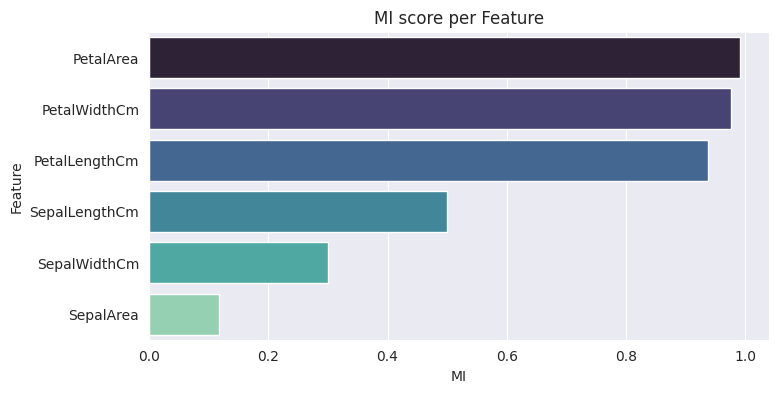

In [13]:
cols = [
    'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 
    'PetalArea', 'SepalArea'
]
var = {
    'variables': [],
    'MI': []
}
for col in df[cols].columns:
    var["variables"].append(col) 
    var["MI"].append(MI(df[col], pd.Categorical(df.Species).codes, bins= 10))

values = pd.DataFrame(data= var).set_index("variables")\
    .sort_values(by= "MI", ascending= False)

plt.figure(figsize= (8,4))
sns.barplot(y= values.index, x= values.MI)

plt.title("MI score per Feature")
plt.xlabel("MI")
plt.ylabel("Feature")
plt.show()

### Plot the Best Two MI Score Features

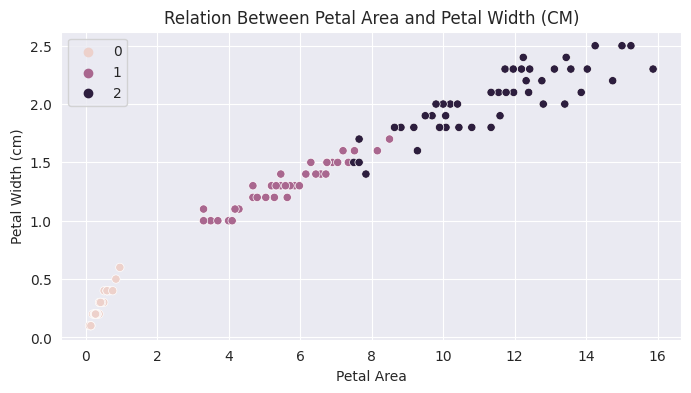

In [14]:
x = df[["PetalArea", "PetalWidthCm"]]
y = pd.Categorical(df.Species).codes

plt.figure(figsize= (8, 4))
sns.scatterplot(data= x, x= "PetalArea", y= "PetalWidthCm", hue= y)
plt.title("Relation Between Petal Area and Petal Width (CM)")
plt.xlabel("Petal Area")
plt.ylabel("Petal Width (cm)")
plt.show()

### Plot the Best Three MI Score Features

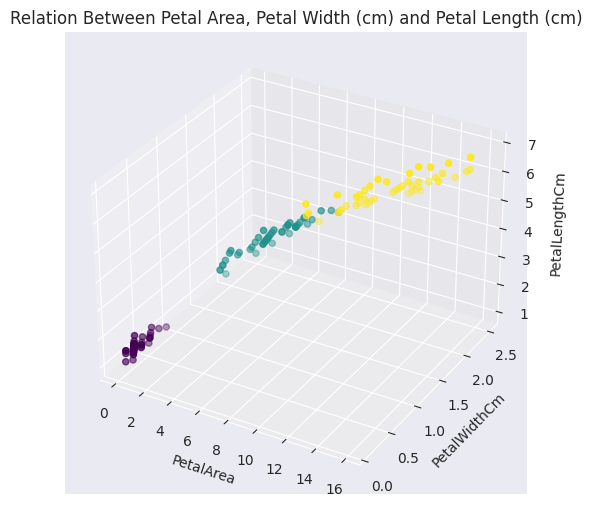

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['PetalArea'], df['PetalWidthCm'], df['PetalLengthCm'], 
           c= y, marker='o', cmap= 'viridis')


ax.set_xlabel('PetalArea')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('PetalLengthCm')
ax.set_title("Relation Between Petal Area, Petal Width (cm) and Petal Length (cm)")
plt.show()

## Classification with Logistic Regression

### Data Preprocessing

In [16]:
x = df[["PetalArea", "PetalWidthCm", "PetalLengthCm"]].values

st = StandardScaler()
X = st.fit_transform(x).astype(float)

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size= 0.8)
print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

Train: 117
Test: 30


### Training the model

In [17]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## Evaluate the Model

### Confusion Matrix

In [18]:
cm = confusion_matrix(y_test, model.predict(x_test))
cm

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]])